# Neural Network with Back-Propagation


In [1]:
from NeuralNetCross import NeuralNetCross
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Read and prepare data

### Load clean dataset and scale features

In [2]:
df = pd.read_csv('clean.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['price']).values, df['price'].values, test_size=0.2, random_state=42)
# Scale the features using StandardScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a scaler for the target variable
y_scaler = MinMaxScaler()

# Reshape y to be a 2D array (required for scalers)
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [3]:
X_train_scaled

array([[0.        , 0.        , 0.        , ..., 0.58507629, 0.2       ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.61310743, 0.8       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.22791435, 0.63333333,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.61310743, 0.6       ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.15285896, 0.83333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.61310743, 0.7       ,
        0.        ]])

## Network initialization and model training (k-fold cross-validation)

In [13]:
import numpy as np
from sklearn.model_selection import KFold
from utils import compute_errors

# Input layer should have the same number of neurons as features in the dataset
layers = [27, 9, 5, 1]
folds = 3
k_folds = KFold(n_splits=folds, shuffle=True, random_state=42)
nn = NeuralNetCross(layers, epochs=100, save=True, k_fold_val=folds)

# Initialize empty lists to store metrics for each fold
mse, mae, mape = [], [], []

predictions = []
for fold, (train_index, val_index) in enumerate(k_folds.split(X_train_scaled)):
    print(f"Starting fold {fold + 1}/{folds}...")

    # Create train/validation splits
    X_train, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train, y_val = y_train_scaled[train_index], y_train_scaled[val_index]

    num_patterns = X_train.shape[0]
   
    # Train the neural network on the current fold
    nn.fit(X_train, X_val, y_train, y_val, fold)

    # Predict using the test set
    y_pred = nn.predict(X_test_scaled)
    predictions.append(y_pred)
    
    # Descale predictions for error computation
    y_predicted_descaled = y_scaler.inverse_transform(y_pred)
   
    # Compute errors for the current fold
    fold_mse, fold_mae, fold_mape = compute_errors(y_test, y_predicted_descaled)
    
    # Append the errors to their respective lists
    mse.append(fold_mse)
    mae.append(fold_mae)
    mape.append(fold_mape)

# Compute average errors across folds
avg_mse = np.mean(mse)
avg_mae = np.mean(mae)
avg_mape = np.mean(mape)

nn.plot_loss()

Starting fold 1/3...
Epoch 1/100 - Train Error: 0.0343, Validation Error: 0.0362
Epoch 2/100 - Train Error: 0.0314, Validation Error: 0.0330
Epoch 3/100 - Train Error: 0.0291, Validation Error: 0.0302
Epoch 4/100 - Train Error: 0.0284, Validation Error: 0.0293
Epoch 5/100 - Train Error: 0.0248, Validation Error: 0.0253
Epoch 6/100 - Train Error: 0.0236, Validation Error: 0.0239
Epoch 7/100 - Train Error: 0.0227, Validation Error: 0.0230
Epoch 8/100 - Train Error: 0.0220, Validation Error: 0.0222
Epoch 9/100 - Train Error: 0.0213, Validation Error: 0.0213
Epoch 10/100 - Train Error: 0.0208, Validation Error: 0.0211
Epoch 11/100 - Train Error: 0.0204, Validation Error: 0.0207
Epoch 12/100 - Train Error: 0.0200, Validation Error: 0.0200
Epoch 13/100 - Train Error: 0.0196, Validation Error: 0.0197
Epoch 14/100 - Train Error: 0.0193, Validation Error: 0.0194
Epoch 15/100 - Train Error: 0.0192, Validation Error: 0.0195
Epoch 16/100 - Train Error: 0.0189, Validation Error: 0.0192
Epoch 17/100

## Scatter plot and model assessment (MSE, MAE, MAPE)

In [14]:
from utils import print_errors

# Print errors
print_errors(avg_mse, avg_mae, avg_mape)

mean_squared_error :  53600434.67666667
mean_absolute_error :  5552.39
mean_absolute_percentage_error :  0.11333333333333333


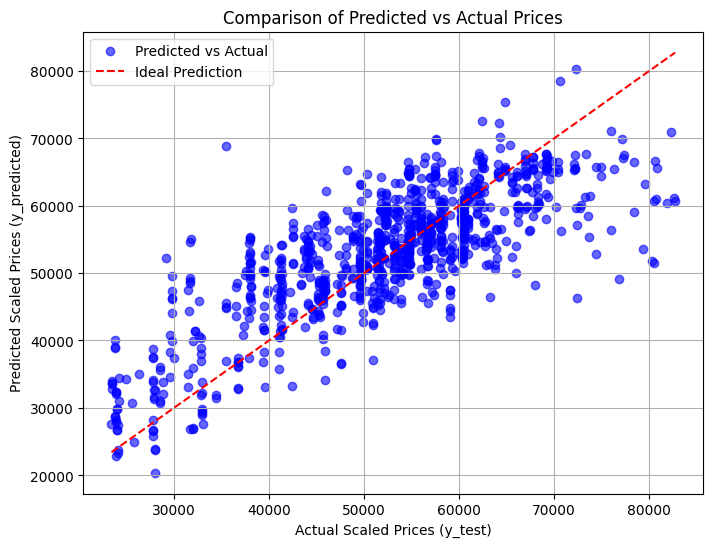

In [12]:
from utils import scatter

scatter(y_test, y_predicted_descaled)